In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg


img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
validation_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    

model = Sequential()
model.add(Conv2D(24, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
    

loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)




print(model.summary())
model.save('Covid_Phenomena_FirstTrail.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/20
47/47 [==============================] - 16s 349ms/step - loss: 1.0447 - accuracy: 0.4478 - val_loss: 0.7770 - val_accuracy: 0.6094
Epoch 2/20
47/47 [==============================] - 17s 354ms/step - loss: 0.5865 - accuracy: 0.7720 - val_loss: 0.3096 - val_accuracy: 0.8854
Epoch 3/20
47/47 [==============================] - 22s 471ms/step - loss: 0.5012 - accuracy: 0.8372 - val_loss: 0.2199 - val_accuracy: 0.9115
Epoch 4/20
47/47 [==============================] - 34s 721ms/step - loss: 0.2528 - accuracy: 0.9118 - val_loss: 0.2096 - val_accuracy: 0.9323
Epoch 5/20
47/47 [==============================] - 25s 535ms/step - loss: 0.3745 - accuracy: 0.8860 - val_loss: 0.2184 - val_accuracy: 0.9167
Epoch 6/20
47/47 [==============================] - 24s 519ms/step - loss: 0.1132 - accuracy: 0.9661 - val_loss: 0.2846 - val_accuracy: 0.9219
Epoch 7/20
47/47 [==============================] - 25s 539m

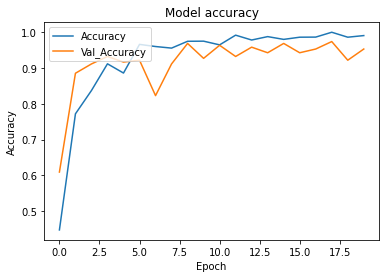

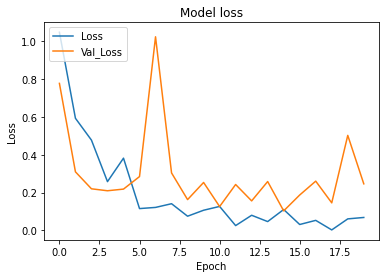

In [3]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()